In [1334]:
import tensorflow as tf
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import os
import numpy as np
import pickle
import matplotlib
from sklearn.metrics import confusion_matrix

np.set_printoptions(precision=5, suppress=True)

In [32]:
data_path = os.path.dirname(os.path.realpath('')) + '/Programming Assignment 1/data_prog2'
train_data_path = data_path + "/train_data"
test_data_path = data_path + "/test_data"
train_labels_path = data_path + "/labels/train_label.txt"
test_labels_path = data_path + "/labels/test_label.txt"

In [354]:
# train_data = 25112*784
num_train_data = len(os.listdir(train_data_path))
train_data = []
for filename in sorted(os.listdir(train_data_path)):
    image = mpimg.imread(os.path.join(train_data_path, filename))
    train_data.append(image.reshape(784).tolist())

In [356]:
# test_data = 4982*784
num_test_data = len(os.listdir(test_data_path))
test_data = []
for filename in sorted(os.listdir(test_data_path)):
    image = mpimg.imread(os.path.join(test_data_path, filename))
    test_data.append(image.reshape(784).tolist())

In [368]:
# normalize data
X_train = [[y / 255. for y in x] for x in train_data]
X_test = [[y / 255. for y in x] for x in test_data]

In [620]:
# onehot encode output to 5 categories
# Y_train = 25112*5
Y_train = []
with open(train_labels_path,'r') as f:
    for line in f.readlines():
        j = int(line[:-1]) - 1
        tmp = [0.] * 5
        tmp[j] = 1.
        Y_train.append(tmp)
    
# Y_test = 4982*5
Y_test = []
with open(test_labels_path,'r') as f:
    for line in f.readlines():
        j = int(line[:-1]) - 1
        tmp = [0.] * 5
        tmp[j] = 1.
        Y_test.append(tmp)

In [831]:
X_train = np.matrix(X_train)
X_test = np.matrix(X_test)
Y_train = np.matrix(Y_train)
Y_test = np.matrix(Y_test)

In [ ]:
def softmax_matrix(x):
    # x = 5*N matrix
    return np.exp(x) / np.sum(np.exp(x), axis = 0)

In [1433]:
def compute_loss_matrix(Y_hat, Y):
    # Y, Y_hat = 5*N matrix
    return -1 / Y.shape[1] * np.sum(np.multiply(Y, np.log(Y_hat)))

In [1472]:
X = X_train.T # 784*25112
Y = Y_train.T # 5*25112

W = np.matrix(np.random.rand(784,5)) * 0.001
b = np.matrix(np.random.rand(5,1)) * 0.001

lr = 0.00001
tol = 0.0001
losses = []
train_acc = []
test_acc = []

for i in range(400):
    Z = np.matmul(W.T, X) + b # 5*25112
    Y_hat = softmax_matrix(Z) # 5*25112

    loss = compute_loss_matrix(Y_hat, Y)
    losses.append(loss)
    if i > 0 and abs(losses[i] - losses[i-1]) <= tol:
        print('Convergence reached. End Process')
        break

    dW = X * (Y_hat-Y).T
    db = np.sum(Y_hat-Y, axis = 1)

    W -= lr * dW 
    b -= lr * db
    
    correct = 0
    for x,y in zip(Y_hat.T, Y.T):
        x = x.reshape(5,1).tolist()
        y = y.reshape(5,1).tolist()
        predict_ind = x.index(max(x))
        answer_ind = y.index(max(y))
        if predict_ind == answer_ind:
            correct += 1
    
    test_correct = 0
    Y_hat_test = softmax_matrix(W.T * X_test.T + b)
    for x,y in zip(Y_hat_test.T, Y_test):
        x = x.reshape(5,1).tolist()
        y = y.reshape(5,1).tolist()
        predict_ind = x.index(max(x))
        answer_ind = y.index(max(y))
        if predict_ind == answer_ind:
            test_correct += 1
    
    train_acc.append(correct / Y.shape[1])
    test_acc.append(test_correct / Y_test.shape[0])
        
#     if i % 100 == 0:
    print('Iter {:2d} loss: {:.5f} Accuracy: {:.5f}'.format(i+1, loss, correct/Y.shape[1]))

Iter  1 loss: 1.60979 Accuracy: 0.15367
Iter  2 loss: 1.24184 Accuracy: 0.72009
Iter  3 loss: 1.00837 Accuracy: 0.84585
Iter  4 loss: 0.85774 Accuracy: 0.83088
Iter  5 loss: 0.75617 Accuracy: 0.86986
Iter  6 loss: 0.68344 Accuracy: 0.86130
Iter  7 loss: 0.62894 Accuracy: 0.88129
Iter  8 loss: 0.58642 Accuracy: 0.87866
Iter  9 loss: 0.55225 Accuracy: 0.88734
Iter 10 loss: 0.52414 Accuracy: 0.88742
Iter 11 loss: 0.50054 Accuracy: 0.89352
Iter 12 loss: 0.48040 Accuracy: 0.89491
Iter 13 loss: 0.46297 Accuracy: 0.89770
Iter 14 loss: 0.44770 Accuracy: 0.89929
Iter 15 loss: 0.43420 Accuracy: 0.90116
Iter 16 loss: 0.42216 Accuracy: 0.90268
Iter 17 loss: 0.41134 Accuracy: 0.90403
Iter 18 loss: 0.40155 Accuracy: 0.90570
Iter 19 loss: 0.39265 Accuracy: 0.90706
Iter 20 loss: 0.38450 Accuracy: 0.90825
Iter 21 loss: 0.37702 Accuracy: 0.90925
Iter 22 loss: 0.37012 Accuracy: 0.91004
Iter 23 loss: 0.36373 Accuracy: 0.91120
Iter 24 loss: 0.35780 Accuracy: 0.91211
Iter 25 loss: 0.35226 Accuracy: 0.91299


Iter 204 loss: 0.19916 Accuracy: 0.94166
Iter 205 loss: 0.19899 Accuracy: 0.94166
Iter 206 loss: 0.19881 Accuracy: 0.94166
Iter 207 loss: 0.19864 Accuracy: 0.94170
Iter 208 loss: 0.19847 Accuracy: 0.94170
Iter 209 loss: 0.19830 Accuracy: 0.94170
Iter 210 loss: 0.19813 Accuracy: 0.94170
Iter 211 loss: 0.19796 Accuracy: 0.94174
Iter 212 loss: 0.19779 Accuracy: 0.94182
Iter 213 loss: 0.19763 Accuracy: 0.94182
Iter 214 loss: 0.19746 Accuracy: 0.94182
Iter 215 loss: 0.19730 Accuracy: 0.94182
Iter 216 loss: 0.19713 Accuracy: 0.94182
Iter 217 loss: 0.19697 Accuracy: 0.94198
Iter 218 loss: 0.19681 Accuracy: 0.94198
Iter 219 loss: 0.19665 Accuracy: 0.94206
Iter 220 loss: 0.19650 Accuracy: 0.94206
Iter 221 loss: 0.19634 Accuracy: 0.94210
Iter 222 loss: 0.19618 Accuracy: 0.94214
Iter 223 loss: 0.19603 Accuracy: 0.94218
Iter 224 loss: 0.19588 Accuracy: 0.94214
Iter 225 loss: 0.19572 Accuracy: 0.94222
Iter 226 loss: 0.19557 Accuracy: 0.94230
Iter 227 loss: 0.19542 Accuracy: 0.94234
Iter 228 loss: 0

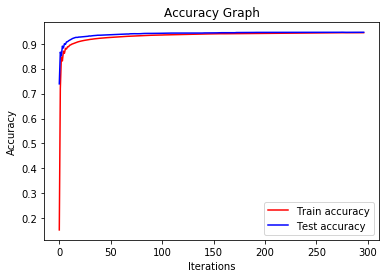

In [1483]:
plt.plot(range(len(train_acc)), train_acc, 'r')
plt.plot(range(len(test_acc)), test_acc, 'b')

# plt.plot(range(len(xx)), xx, 'r')
# plt.plot(range(len(yy)), yy, 'b')
plt.legend(['Train accuracy','Test accuracy'])
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Accuracy Graph')
plt.show()

In [1469]:
W_1 = W[:,0]
W_2 = W[:,1]
W_3 = W[:,2]
W_4 = W[:,3]
W_5 = W[:,4]

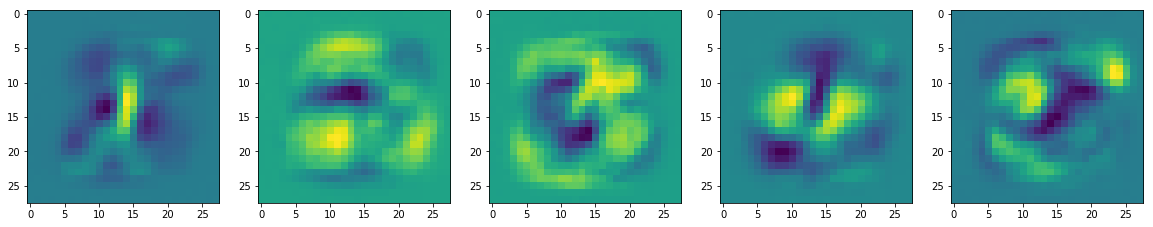

In [1507]:
plt.figure(figsize=(20,10))
plt.subplot(1, 5, 1)
plt.imshow(W_1.reshape(28,28))
plt.subplot(1, 5, 2)
plt.imshow(W_2.reshape(28,28))
plt.subplot(1, 5, 3)
plt.imshow(W_3.reshape(28,28))
plt.subplot(1, 5, 4)
plt.imshow(W_4.reshape(28,28))
plt.subplot(1, 5, 5)
plt.imshow(W_5.reshape(28,28))

# plt.colorbar()
plt.show()

In [1446]:
i = 0
predicts = []
answers = []
for x,y in zip(X_test, Y_test):
    z = np.matmul(W.T, x.T) + b # 5*25112
    y_hat = softmax_matrix(z) # 5*25112
    y_hat = y_hat.tolist()
    predict = y_hat.index(max(y_hat)) + 1
    predicts.append(predict)

    y = y.reshape(5,1).tolist()
    answer = y.index(max(y)) + 1
    answers.append(answer)

Confusion matrix, without normalization
[[1045    4   10    1    4]
 [  12  926   16   22   14]
 [   6   20  954    5   45]
 [  13   10    2  955    3]
 [   7   23   47   10  828]]
Normalized confusion matrix
[[0.98 0.   0.01 0.   0.  ]
 [0.01 0.94 0.02 0.02 0.01]
 [0.01 0.02 0.93 0.   0.04]
 [0.01 0.01 0.   0.97 0.  ]
 [0.01 0.03 0.05 0.01 0.9 ]]


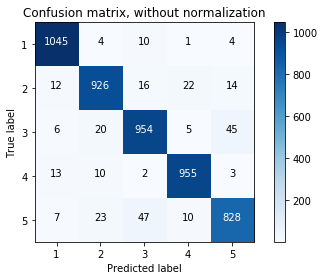

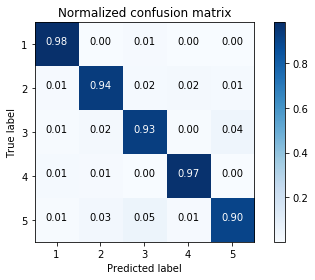

In [1495]:
# code from https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
import itertools 
cnf_matrix = confusion_matrix(answers, predicts)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[1,2,3,4,5],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[1,2,3,4,5], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [1496]:
W_all = np.concatenate((W_arr, b_arr), axis = 0)

In [1497]:
filehandler = open("multiclass_parameters.txt","wb")
pickle.dump(W_all, filehandler)
filehandler.close()